In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'google'

In [50]:
data = pd.read_csv('/content/gdrive/MyDrive/telecom_churn_3.csv')
column_to_move = data.pop("Customer Status")
data.insert(len(data.columns), "Customer Status", column_to_move)
data.head(2)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.3,0.00,0,381.51,974.81,NaN,NaN,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,NaN,NaN,Stayed


In [51]:
data_copy = data.copy() 
data_copy.drop(columns= ['Customer ID'], axis=1, inplace=True)

# Numeric columns
numeric_columns = []
for i in data.describe():
  numeric_columns.append(i)
# filling missing values in numerical data with mean : Simple Imputer
for cols in numeric_columns:
  data_copy[cols].fillna(data[cols].mean())


def encode(df,column_name):# label encoding on given column and returns dictionary for later use (for all but churn ~)
  if(column_name in ['Churn Reason','Churn Category']):
    df.loc[df["Customer Status"] == "Stayed",column_name] = "Not Valid"
    df.loc[df["Customer Status"] == "Joined",column_name] = "Not Valid"

  unique_val = df[column_name].unique()
  for i in range(len(unique_val)):
    if(type(unique_val[i])!= str and math.isnan(unique_val[i])):
        unique_val = np.delete(unique_val, i)
        break

  
  label_value = {} 
  value_label = {}
  for i in range(0,len(unique_val)):
          label_value[unique_val[i]] = i
          value_label[i] = unique_val[i]

  df[column_name].replace(label_value,inplace=True)
  return value_label

def replace_labels(df,cname,label_mapping):
    df[cname].replace(label_mapping,inplace=True)


# Categorical Cols
categorical_columns = [] 
for i in data_copy.columns:
  if(i not in numeric_columns):
    categorical_columns.append(i)
  
label_mapping = []   # 
for i in categorical_columns:
  label_mapping.append(encode(data_copy,i))

# Use:KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
imputed_array = imputer.fit_transform(data_copy)


data_copy = pd.DataFrame(imputed_array,columns = data_copy.columns)   # use df for computations
df = data_copy.copy()

data_copy.head(2)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Customer Status
0,0.0,37.0,0.0,0.0,0.0,93225.0,34.827662,-118.999073,2.0,9.0,...,0.0,65.6,593.3,0.00,0.0,381.51,974.81,0.0,0.0,0.0
1,1.0,46.0,1.0,0.0,1.0,91206.0,34.162515,-118.203869,0.0,9.0,...,0.0,-4.0,542.4,38.33,10.0,96.21,610.28,0.0,0.0,0.0


In [69]:
data_copy['Customer Status'].value_counts()

2.525414660246121


In [53]:
idx = 0
for i in categorical_columns:
  replace_labels(df,i,label_mapping[idx])
  idx+=1
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Customer Status
0,Female,37.0,Yes,0.0,Frazier Park,93225.0,34.827662,-118.999073,2.0,9.0,...,Credit Card,65.6,593.30,0.00,0.0,381.51,974.81,Not Valid,Not Valid,Stayed
1,Male,46.0,No,0.0,Glendale,91206.0,34.162515,-118.203869,0.0,9.0,...,Credit Card,-4.0,542.40,38.33,10.0,96.21,610.28,Not Valid,Not Valid,Stayed
2,Male,50.0,No,0.0,Costa Mesa,92627.0,33.645672,-117.922613,0.0,4.0,...,Bank Withdrawal,73.9,280.85,0.00,0.0,134.60,415.45,Competitor,Competitor had better devices,Churned
3,Male,78.0,Yes,0.0,Martinez,94553.0,38.014457,-122.115432,1.0,13.0,...,Bank Withdrawal,98.0,1237.85,0.00,0.0,361.66,1599.51,Dissatisfaction,Product dissatisfaction,Churned
4,Female,75.0,Yes,0.0,Camarillo,93010.0,34.227846,-119.079903,3.0,3.0,...,Credit Card,83.9,267.40,0.00,0.0,22.14,289.54,Dissatisfaction,Network reliability,Churned


In [61]:
# rerun
df1=data_copy.copy()
indexAge = df1[ (df1['Customer Status'] == 2)].index
df1.drop(indexAge , inplace=True)

X = df1.drop('Customer Status',axis = 1)
X.head(2)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason
0,0.0,37.0,0.0,0.0,0.0,93225.0,34.827662,-118.999073,2.0,9.0,...,0.0,0.0,65.6,593.3,0.00,0.0,381.51,974.81,0.0,0.0
1,1.0,46.0,1.0,0.0,1.0,91206.0,34.162515,-118.203869,0.0,9.0,...,1.0,0.0,-4.0,542.4,38.33,10.0,96.21,610.28,0.0,0.0


In [62]:
y = df1['Customer Status']
print(y.value_counts())
# replacing Joined(2) by Stayed(1)
# y.replace(2,0,inplace=True)
# target_names = ['Stayed', 'Churned', 'Joined']
target_names = ['Stayed', 'Churned']

0.0    4720
1.0    1869
Name: Customer Status, dtype: int64


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)

Feature Selection

In [41]:
# Using Multi-Colinearity
correlated_features = set()
correlation_matrix = X_train.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features,len(correlated_features))
train_X=X_train.copy()

X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

for col in correlated_features:
  numeric_columns.remove(col)

{'Longitude', 'Total Revenue', 'Latitude'} 3


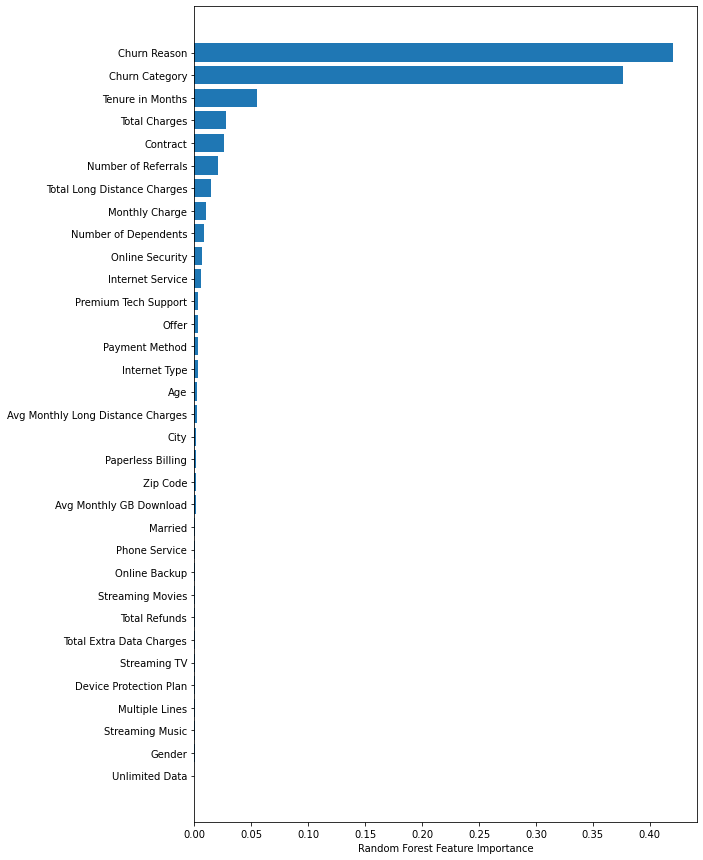

[1.18505672e-04 2.02611437e-04 2.63859836e-04 2.86855184e-04
 2.95477035e-04 2.98929256e-04 3.23779204e-04 3.72909677e-04
 3.98068579e-04 4.32023681e-04 4.56331685e-04 8.67789877e-04
 1.03805666e-03 1.47127504e-03 1.57688012e-03 1.82229178e-03
 2.20356781e-03 2.32427013e-03 2.82674579e-03 2.84215831e-03
 3.08027624e-03 3.56935724e-03 5.55251585e-03 7.17634880e-03
 8.23630348e-03 1.03602940e-02 1.47270742e-02 2.04532884e-02
 2.62772093e-02 2.80454439e-02 5.54022691e-02 3.76722969e-01
 4.19974264e-01]


In [42]:
def Importance(train_X, train_Y):
    rf = RandomForestClassifier(n_estimators=400)
    rf.fit(train_X, train_Y)

    sorted_idx = rf.feature_importances_.argsort()

    plt.figure(figsize=(9,15))
    plt.barh(train_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
    plt.xlabel("Random Forest Feature Importance")
    plt.show()

    return train_X.columns[sorted_idx], rf.feature_importances_[sorted_idx]

a,b=Importance(X_train,y_train)
print(b)

In [43]:
# Variance Thresholf
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
train = selector.fit_transform(X_train[numeric_columns])

low_var = []
for col in (X_train[numeric_columns].columns):
    if(col not in (X_train[numeric_columns].columns[selector.get_support()])):
        low_var.append(col)

low_var

X_train.drop(low_var,axis=1,inplace=True)
X_test.drop(low_var,axis=1,inplace=True)

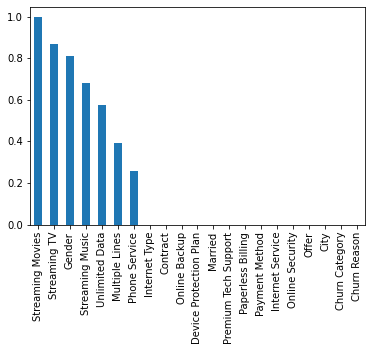

In [44]:
# chi-square for categorical
categorical_columns.remove('Customer Status')
from sklearn.feature_selection import chi2
chi_scores = chi2(X_train[categorical_columns],y_train)
p_values = pd.Series(chi_scores[1],index = X[categorical_columns].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [45]:
independent_cols = [] # those with high p-value
for col in p_values.index:
  if(p_values[col] > 0.75):
    independent_cols.append(col)

X_train.drop(labels=independent_cols,axis=1,inplace=True)
X_test.drop(labels=independent_cols,axis=1,inplace=True)

In [57]:
# Feature Scaling
for i in numeric_columns:
  if(i in X_train.columns):
    mean = X_train[i].mean()
    std = X_train[i].std()
    X_train[i] = (X_train[i]-mean)/std
    X_test[i] = ((X_test[i]-mean)/std)

In [58]:
#@title code for cf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

Logisitic Regression

0.9036236008347562
0.8922610015174507
              precision    recall  f1-score   support

      Stayed       0.89      0.97      0.93       944
     Churned       0.90      0.70      0.79       374

    accuracy                           0.89      1318
   macro avg       0.90      0.83      0.86      1318
weighted avg       0.89      0.89      0.89      1318



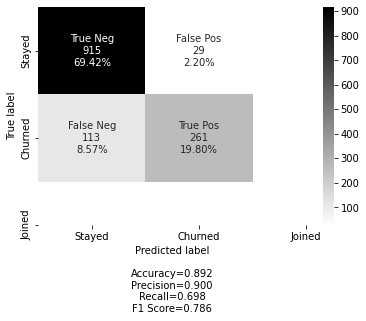

In [64]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.fit(X_train, y_train).predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Stayed','Churned','Joined']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

from sklearn import metrics
target_names = ['Stayed', 'Churned']
print(metrics.classification_report(y_test, y_pred,target_names=target_names))

GaussianNB

Number of mislabeled points out of a total 1318 points : 7
0.9971542401821286
0.9946889226100152
              precision    recall  f1-score   support

      Stayed       1.00      0.99      1.00       944
     Churned       0.98      1.00      0.99       374

    accuracy                           0.99      1318
   macro avg       0.99      1.00      0.99      1318
weighted avg       0.99      0.99      0.99      1318



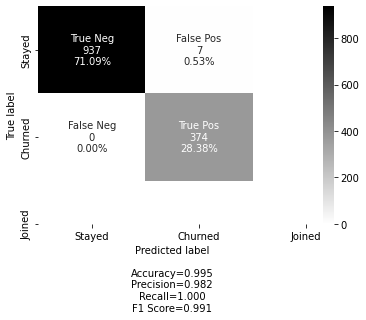

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Stayed','Churned','Joined']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

from sklearn import metrics
target_names = ['Stayed', 'Churned']
print(metrics.classification_report(y_test, y_pred,target_names=target_names))

Bernoulli Naive Bayes

1.0
1.0
              precision    recall  f1-score   support

      Stayed       1.00      1.00      1.00       944
     Churned       1.00      1.00      1.00       374

    accuracy                           1.00      1318
   macro avg       1.00      1.00      1.00      1318
weighted avg       1.00      1.00      1.00      1318



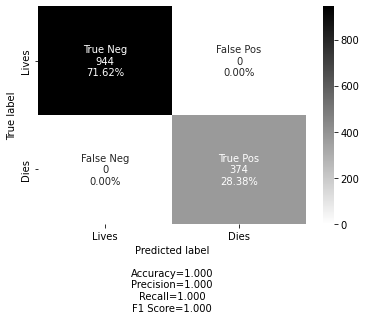

In [70]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred = model.fit(X_train, y_train).predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Lives','Dies']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

from sklearn import metrics
target_names = ['Stayed', 'Churned']
print(metrics.classification_report(y_test, y_pred,target_names=target_names))

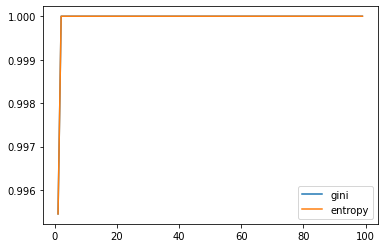

In [ ]:
# print ("Accuracy of tuned model",best_model.score(X_test,y_test))
entropy = [ ]
gini =  [ ]

from sklearn.ensemble import RandomForestClassifier
for i in range(1,100):
  model1 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=i, random_state=42)
  model1.fit(X_train, y_train)
  y_pred = model1.fit(X_train, y_train).predict(X_test)
  entropy.append(model1.score(X_test,y_test))

for i in range(1,100):
  model1 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=i, random_state=42)
  model1.fit(X_train, y_train)
  y_pred = model1.fit(X_train, y_train).predict(X_test)
  gini.append(model1.score(X_test,y_test))

sns.lineplot(x=np.arange(1,len(gini)+1,1), y=gini,label="gini")
sns.lineplot(x=np.arange(1,len(gini)+1,1), y=entropy,label="entropy")

In [68]:
# SVM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import log_loss,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  
def SVM(kernel,degree=100):
  if degree==100:
    model = SVC(kernel=kernel)
  else:
    model = SVC(kernel=kernel,degree=degree)

 
  # for i in range(epochs):
  model.fit(X_train,y_train).score(X_train,y_train)
  y_pred = model.predict(X_test)
  # loss=mean_squared_error(y_test,model.predict_proba(X_test))
  score = accuracy_score(y_test, y_pred) 
  # print(classification_report(y_test, y_pred))
  return score
  
  
kernels=['linear','rbf','poly','sigmoid']
epochs=100
max_accuracy=0
best_kernel=""
for k in kernels:
  if k=="poly":
    acc=SVM(kernel=k,degree=8)
  else:
    acc=SVM(k)
  print("Obtained a accuracy of:", acc, " with kernel: ", k)
  if acc > max_accuracy:
      max_accuracy=acc
      best_kernel = k
    
print("Maximum accuracy is: ",max_accuracy," with kernel: ",best_kernel)

Obtained a accuracy of: 0.9370257966616085  with kernel:  linear
Obtained a accuracy of: 0.716236722306525  with kernel:  rbf
Obtained a accuracy of: 0.716236722306525  with kernel:  poly
Obtained a accuracy of: 0.716236722306525  with kernel:  sigmoid
Maximum accuracy is:  0.9370257966616085  with kernel:  linear


In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

n_estimators=[5,10,15,20]
max_depth=[4,8,10,15,20]
criterion=["gini","entropy"]
best = 0
store_info = ["","",""]
for estimator in n_estimators:
  for depth in max_depth:
    for criteria in criterion:
      model = RandomForestClassifier(n_estimators=estimator,criterion=criteria,max_depth=depth,random_state=42)
      print("----------------------------------------------------------")
      print("Estimator:",estimator," Depth:",depth,"Criteria:",criteria)
      _y_pred = model.predict(_X) 
      acc=accuracy_score(y_test,_y_pred)
      print("Testing Score",acc )
      if(acc>best):
        best=acc
        store_info[0]=estimator
        store_info[1]=depth
        store_info[2]=criteria

print("The best accuracy we got was for the model with estimator = ",store_info[0]," depth = ",store_info[1]," criteria = ",store_info[2]," with accucracy = ",best)
get_roc_auc(rf,X_test,y_test)

XGboost

ANN

----------------------------
Acitivation function: logistic
Training Loss 0.5964474361837138 0.5964474361837138
Validation Loss 0.5965776252102514 0.5965776252102514
Train Score: 0.7163726048188199
Test Score: 0.716236722306525
----------------------------
----------------------------
Acitivation function: relu
Training Loss 0.4638423013614863 0.4638423013614863
Validation Loss 0.630446679891259 0.630446679891259
Train Score: 0.9734395750332006
Test Score: 0.9688922610015175
----------------------------
----------------------------
Acitivation function: tanh
Training Loss 0.5963467670149245 0.5963467670149245
Validation Loss 0.5964725608361652 0.5964725608361652
Train Score: 0.7163726048188199
Test Score: 0.716236722306525
----------------------------
----------------------------
Acitivation function: identity
Training Loss 1.7064532109751107 1.7064532109751107
Validation Loss 1.7335361794468043 1.7335361794468043
Train Score: 0.9474483020299753
Test Score: 0.9468892261001517
---------

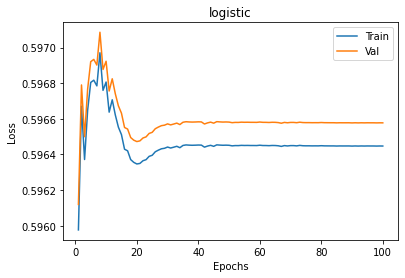

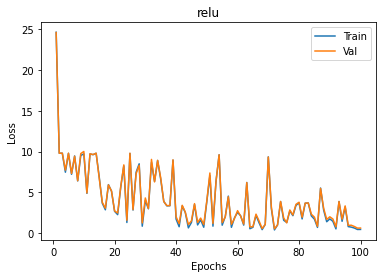

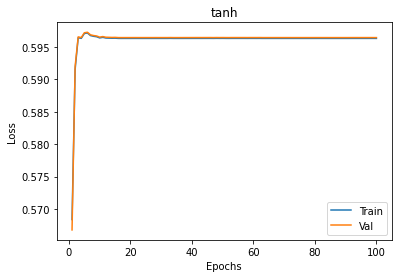

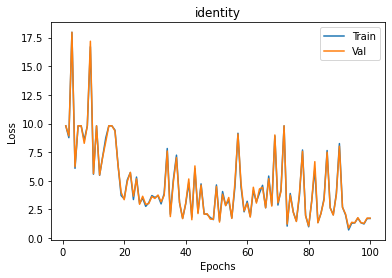

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import seaborn as sns


epochs = 100
batch_size = 50

X_val = X_test
y_val = y_test


activation_functions = ['logistic','relu','tanh','identity']
for k in activation_functions:
  train_loss = []
  val_loss = []

  model = MLPClassifier(hidden_layer_sizes=(256,32),activation=k)
  for i in range(epochs):
      idx = 0
      number_of_batches = int(len(X_train)/batch_size)
      for j in range(number_of_batches):
          model.partial_fit(X_train.iloc[j*batch_size:(j+1)*(batch_size),:],y_train[j*batch_size:(j+1)*(batch_size)],classes=np.unique(y_train))
      train_loss.append(log_loss(y_train,model.predict_proba(X_train)))
      val_loss.append(log_loss(y_val,model.predict_proba(X_val)))
    

  print("----------------------------")
  print('Acitivation function:',k)
  print("Training Loss",train_loss[-1],log_loss(y_train,model.predict_proba(X_train)))
  print("Validation Loss",val_loss[-1],log_loss(y_val,model.predict_proba(X_val)))
  from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
  print("Train Score:",model.score(X_train,y_train))
  print("Test Score:",model.score(X_val,y_val))
  print("----------------------------")

  sns.lineplot(x=np.arange(1,epochs+1,1),y=train_loss,label='Train')
  sns.lineplot(x=np.arange(1,epochs+1,1),y=val_loss,label='Val')

  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title(k)
  plt.legend()
  plt.figure()

Can do PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pca_accuracy = []
pca_precision = []
pca_recall = []
pca_f1score = []
train_accuracy=[]

for i in range(5):
    X_reduced = PCA(n_components=i).fit_transform(X_train)
    model = LogisticRegression()
    y_pred = model.fit(X_train, y_train).predict(X_test)
    pca_accuracy.append(accuracy_score(y_test,y_pred))
    # pca_recall.append(recall_score(y_test, y_pred))
    # pca_precision.append(precision_score(y_test, y_pred))
    # pca_f1score.append(f1_score(y_test, y_pred))

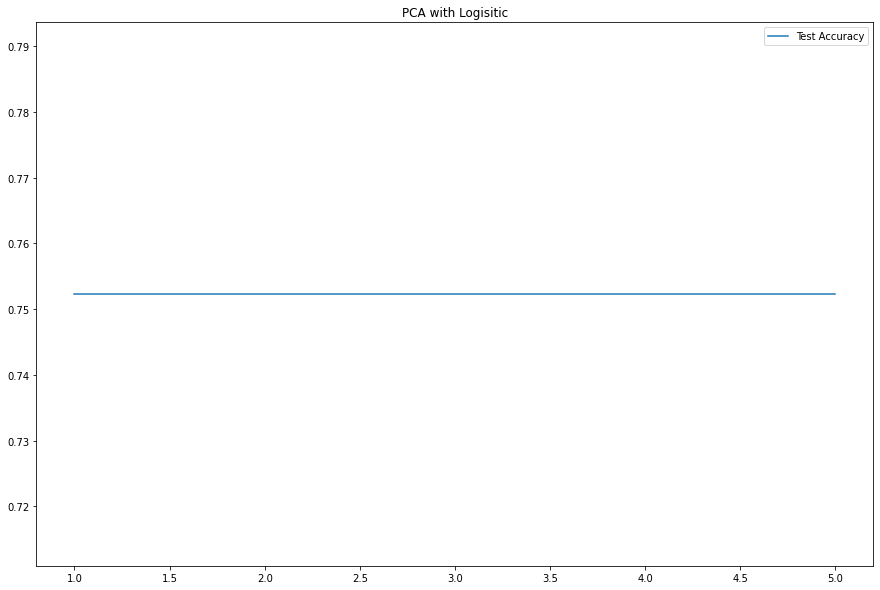

In [ ]:
fig = plt.figure(figsize = (15, 10))
plt.title('PCA with Logisitic')
sns.lineplot(x=np.arange(1,5+1,1), y=pca_accuracy,label="Test Accuracy")